# Fixed vs. varying covariance

---

#### Varying covariance had 3-4x lower errors than fixed covariance on simulated high resolution noiseless maps using  peak counting.

Note: only using 100 maps per simulation now.

---
*Author: Dezso Ribli*


In [1]:
from glob import glob
import os
import pickle
from generalized_peak_counting import PeakCount, rmse

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Load data

In [2]:
fns = sorted(glob('/mnt/data/weaklens/guptadata/*/*00_00*.fits'))  # 100 filenames
# fns = sorted(glob('/mnt/data/weaklens/guptadata/*/*.fits'))  # all filenames

# parameters
sis = [float(os.path.basename(os.path.dirname(fn))[10:15]) for fn in fns]
oms = [float(os.path.basename(os.path.dirname(fn))[2:7]) for fn in fns]

### Initialize models

In [3]:
RES = 0.2  # angular resolution in arcmin

# original peak height statistics
pc_fix = PeakCount(peak_counting_method = 'original',
                   resolution_arcmin = RES,
                   covariance = 'fixed',
                   bins = np.linspace(-0.03,0.19,23))

# peak steepness statistics
pc_var = PeakCount(peak_counting_method = 'original',
                   covariance = 'varying',
                   resolution_arcmin = RES,
                   bins = np.linspace(-0.03,0.19,23))

### Calculate mean histograms and covariances

In [4]:
%%time
pc_fix.fit(fns, oms, sis)
pc_var.fit(fns, oms, sis)

CPU times: user 6min 33s, sys: 1min 23s, total: 7min 56s
Wall time: 11min 35s


### Predict parameters for each map

In [5]:
%%time
p_fix_o,p_fix_s = zip(*[pc_fix.predict(fn) for fn in fns])
p_var_o,p_var_s = zip(*[pc_var.predict(fn) for fn in fns])

CPU times: user 6min 40s, sys: 2min 1s, total: 8min 42s
Wall time: 11min 58s


### Evaluate errors

In [14]:
print 'Fixed covariance, RMSE Omega_m', rmse(oms,p_fix_o)
print 'Varying covariance, RMSE Omega_m', rmse(oms, p_var_o)
print
print 'Fixed covariance, RMSE sigma_8', rmse(sis, p_fix_s)
print 'Varying covariance, RMSE sigma_8', rmse(sis, p_var_s)

Fixed covariance, RMSE Omega_m 0.04350559385259074
Varying covariance, RMSE Omega_m 0.00928103505809997

Fixed covariance, RMSE sigma_8 0.060161973616157494
Varying covariance, RMSE sigma_8 0.019951169636377573


### Plot predictions

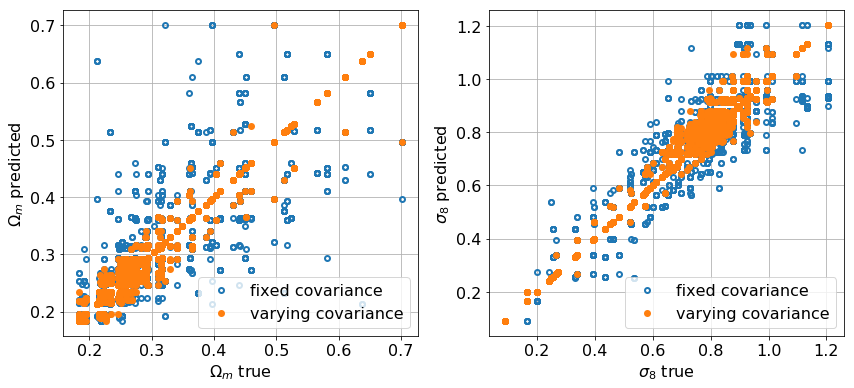

In [16]:
ms = 5
fs = 16
mew = 2.

figsize(14,6)
f,a = plt.subplots(1,2)

plt.sca(a[0])
plot(oms, p_fix_o,'o',ms=ms, mew=mew,mfc='none', label='fixed covariance')
plot(oms, p_var_o,'o',ms=ms, mew=mew, label='varying covariance')
legend(fontsize=fs, loc='lower right')
xlabel(r'$\Omega_m$ true', fontsize=fs)
ylabel(r'$\Omega_m$ predicted', fontsize=fs)
grid(which='both')
xticks(fontsize=fs)
yticks(fontsize=fs)

plt.sca(a[1])
plot(sis, p_fix_s,'o',ms=ms, mew=mew,mfc='none', label='fixed covariance')
plot(sis, p_var_s,'o',ms=ms, mew=mew, label='varying covariance')
legend(fontsize=fs, loc='lower right')
xlabel(r'$\sigma_8$ true', fontsize=fs)
ylabel(r'$\sigma_8$ predicted', fontsize=fs)
grid(which='both')
xticks(fontsize=fs)
yticks(fontsize=fs);

### Save models and predictions 

In [13]:
pickle.dump((pc_fix, pc_var, oms, sis, p_fix_o, p_fix_s, p_var_o, p_var_s),
            open('results_fix_var_100.pkl','wb'))

# The end